Analysis Tasks

1 - Basic Statistics tasks

2 - Which store has maximum sales

3 - Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

4 - Which store/s has good quarterly growth rate in Q3’2012

5 - Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Holiday weeks

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

URL: https://www.kaggle.com/vik2012kvs/walmart-dataretail-analysis

## Pandas

In [1]:
#!pip install pandas=='1.2.3'

import pandas as pd

print(f'Pandas version {pd.__version__}')

Pandas version 1.2.3


## Seaborn

In [2]:
#!pip install seaborn=='0.11.1'

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Accent')
print(f'Seaborn version {sns.__version__}')

Seaborn version 0.11.0


In [4]:
import matplotlib.pyplot as plt

In [6]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

# Dataset

In [5]:
dataset = pd.read_csv(
    'Walmart_Store_sales.csv'
)

## Features of dataset

### Info

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
dataset.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

* there are no missing values in all variables
* there are no invalid data
* the variable Date is dtype 'object'

# 1 - Basic Statistcs Task

## Weekly_Sales (dependent variable - y)

### Distribution

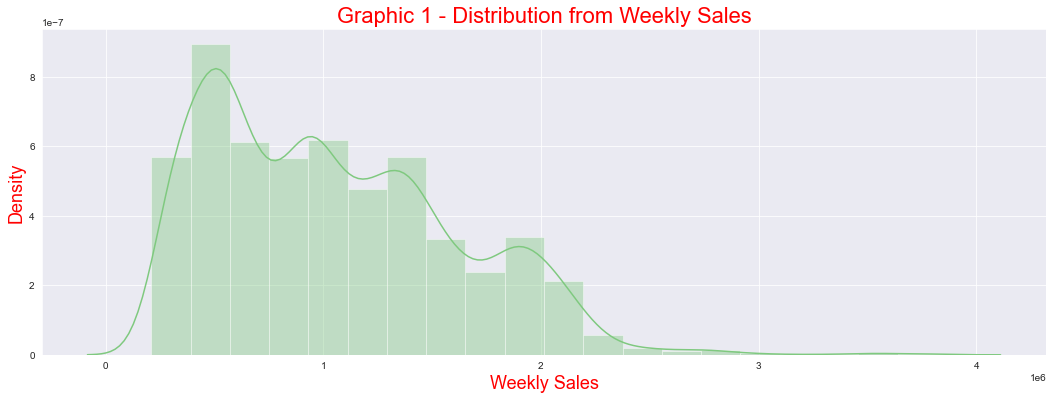

In [7]:
graphic1 = sns.distplot(dataset['Weekly_Sales'], norm_hist=True, bins=20)
graphic1.figure.set_size_inches(18,6)
graphic1.set_title('Graphic 1 - Distribution from Weekly Sales', color='r', fontsize=22)
graphic1.set_xlabel('Weekly Sales', color='r', fontsize=18)
graphic1.set_ylabel('Density', color='r', fontsize=18)
graphic1 = graphic1

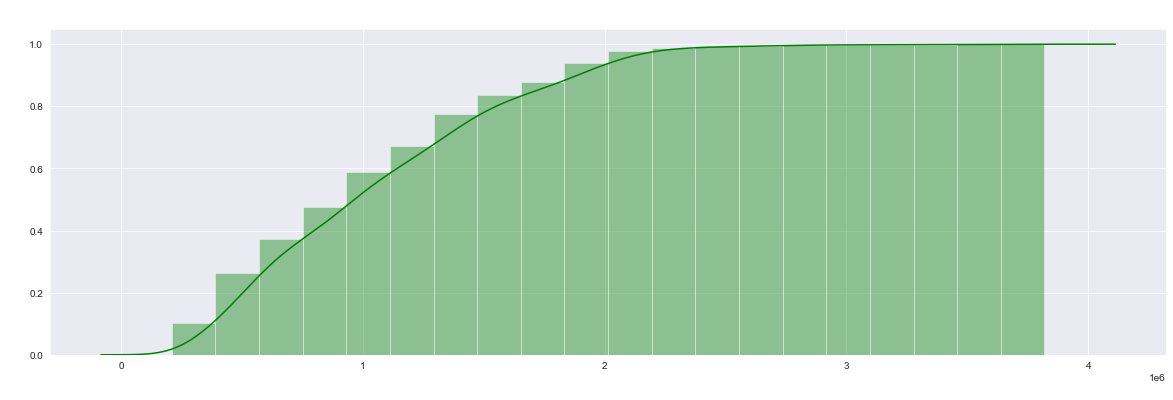

In [8]:
graphic2 = sns.distplot(dataset['Weekly_Sales'], bins=20, color='g', kde_kws={'cumulative':True}, hist_kws={'cumulative':True})
graphic2.figure.set_size_inches(20,6)
graphic2.set_title('Graphic 2 - Distribution from Weekly Sales', color='w', fontsize=22)
graphic2.set_xlabel('Weekly Sales', color='w', fontsize=18)
graphic2.set_ylabel('Frequency', color='w', fontsize=18)
graphic2 = graphic2

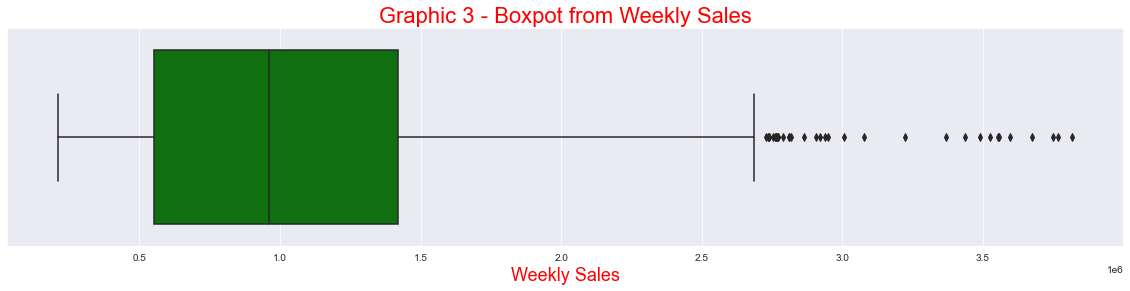

In [9]:
graphic3 = sns.boxplot(dataset['Weekly_Sales'], color='g')
graphic3.figure.set_size_inches(20,4)
graphic3.set_title('Graphic 3 - Boxpot from Weekly Sales', fontsize=22, color='r')
graphic3.set_xlabel('Weekly Sales', color='r', fontsize=18)
graphic3 = graphic3

In [10]:
mean = dataset['Weekly_Sales'].mean()
median = dataset['Weekly_Sales'].median()
standard_deviation = dataset['Weekly_Sales'].std()

print(f'AVERAGE = {mean:.2f}\nMEDIAN = {median:.2f}\nSTANDARD DEVIATION = {standard_deviation:.2f}')

AVERAGE = 1046964.88
MEDIAN = 960746.04
STANDARD DEVIATION = 564366.62


### Observation

* the variable Weekly_Sales have an assimetric distribution from right
* mean is bigger from median
* almost 60% of all values are located before mean
* there are some outliers (is it the holiday weeks?)

### Weekly_Sales x Holiday_Flag

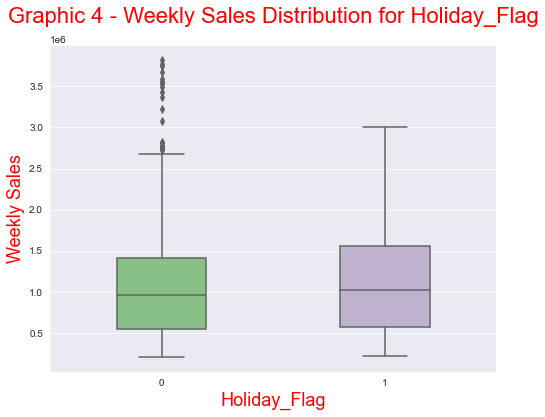

In [16]:
graphic4 = sns.boxplot(
    data=dataset,
    y=dataset['Weekly_Sales'],
    x=dataset['Holiday_Flag'],
    width=0.4                 
)
graphic4.figure.set_size_inches(8,6)
graphic4.set_title('Graphic 4 - Weekly Sales Distribution for Holiday_Flag', color='r', fontsize=22, y=1.05)
graphic4.set_xlabel('Holiday_Flag', color='r', fontsize=18)
graphic4.set_ylabel('Weekly Sales', color='r', fontsize=18)
graphic4 = graphic4

* Seems which the outliers are not in Holiday_Flag, but in "normal" week

### Weekly_Sales X Date

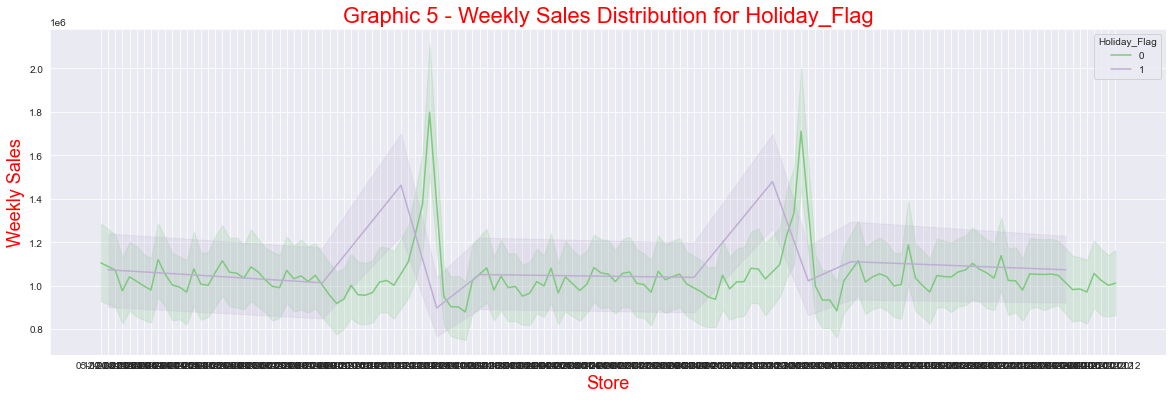

In [17]:
graphic5 = sns.lineplot(
    data=dataset,
    x='Date',
    y='Weekly_Sales',
    hue='Holiday_Flag'                        
)
graphic5.figure.set_size_inches(20,6)
graphic5.set_title('Graphic 5 - Weekly Sales Distribution for Holiday_Flag', color='r', fontsize=22)
graphic5.set_xlabel('Store', color='r', fontsize=18)
graphic5.set_ylabel('Weekly Sales', color='r', fontsize=18)

graphic5 = graphic5

- there are two "normal" weeks when total sales was bigger from holiday week (is it incorrect?)

### Weekly_Sales x Stores

Text(0, 0.5, 'Weekly Sales')

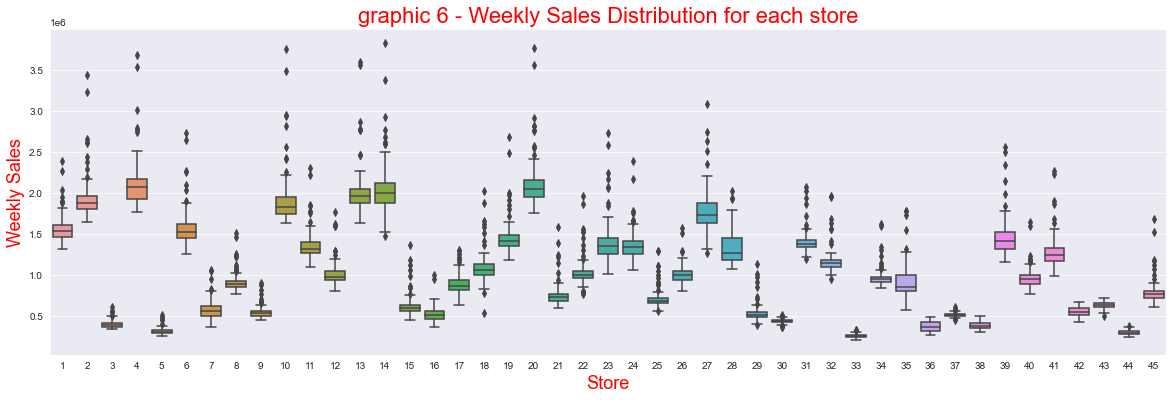

In [13]:
graphic6 = sns.boxplot(
    data=dataset,
    y=dataset['Weekly_Sales'],
    x=dataset['Store']            
)
graphic6.figure.set_size_inches(20,6)
graphic6.set_title('graphic 6 - Weekly Sales Distribution for each store', color='r', fontsize=22)
graphic6.set_xlabel('Store', color='r', fontsize=18)
graphic6.set_ylabel('Weekly Sales', color='r', fontsize=18)

### Weekly_Sales x Holiday

In [14]:
normal_week_sales = dataset.query('Holiday_Flag==0')['Weekly_Sales'].sum() / dataset['Weekly_Sales'].sum()
holiday_week_sales = dataset.query('Holiday_Flag==1')['Weekly_Sales'].sum() /  dataset['Weekly_Sales'].sum()

holiday = {
    'Frequency': dataset['Holiday_Flag'].value_counts().values,
    'Percent_Frequency': dataset['Holiday_Flag'].value_counts(normalize=True).values * 100,
    'Total Sales':dataset.groupby('Holiday_Flag')['Weekly_Sales'].sum(),
    'Percent_Sales': pd.Series(data=[normal_week_sales, holiday_week_sales], index=[0,1]) * 100          
}
pd.DataFrame(holiday)

,Frequency,Percent_Frequency,Total Sales,Percent_Sales
0,5985,93.006993,6.231919e+09,92.499879
1,450,6.993007,5.052996e+08,7.500121


### Correlation

Text(34.0, 0.5, 'Weekly Sales')

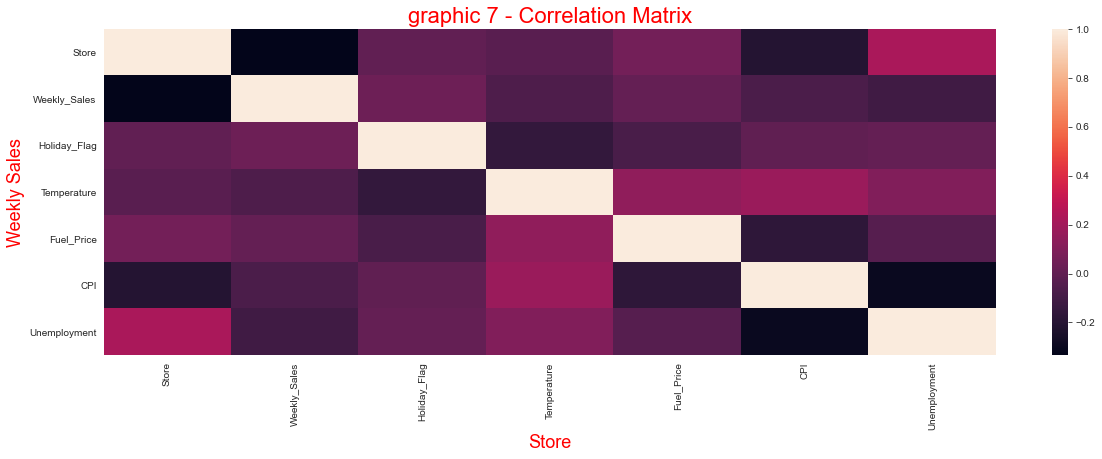

In [15]:
graphic7 = sns.heatmap(dataset.corr())
graphic7.figure.set_size_inches(20,6)
graphic7.set_title('graphic 7 - Correlation Matrix', color='r', fontsize=22)
graphic7.set_xlabel('Store', color='r', fontsize=18)
graphic7.set_ylabel('Weekly Sales', color='r', fontsize=18)

In [16]:
dataset.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


# 2 - Which store has maximum sales

In [17]:
ranking = dataset.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(f'Store {ranking.index[0]} has the maximum sales.')

Store 20 has the maximum sales.


# 3 - Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [18]:
standard_deviation = dataset.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
mean_std = standard_deviation.mean()

print(f'Store {standard_deviation.index[0]} has the maximum std ({standard_deviation.iloc[0]:.2f}).\nThe mean of std is {mean_std:.2f}.')

Store 14 has the maximum std (317569.95).
The mean of std is 141585.86.


# 4 - Which store/s has good quarterly growth rate in Q3’2012

## Create columns with split Date

In [19]:
data_split = dataset['Date'].str.split('-', expand=True)
dataset['Day'] = data_split[:][0]
dataset['Month'] = data_split[:][1]
dataset['Year'] = data_split[:][2]

In [20]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010


## Create column quarter

In [21]:
dict_quarter = {
    '01':'Q1', '02':'Q1', '03':'Q1',
    '04':'Q2', '05':'Q2', '06':'Q2',
    '07':'Q3', '08':'Q3', '09':'Q3',
    '10':'Q4', '11':'Q4', '12':'Q4'
}

dataset['Quarter'] = dataset['Month'].map(dict_quarter)
#check
dataset.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
5895,42,17-09-2010,536871.58,0,85.52,3.028,126.145467,9.199,17,09,2010,Q3
5805,41,23-09-2011,1173059.79,0,55.06,3.581,194.809971,6.901,23,09,2011,Q3
1582,12,09-04-2010,1041238.87,0,59.25,3.090,126.601903,14.099,09,04,2010,Q2
4150,30,26-02-2010,472330.71,0,45.31,2.561,210.975957,8.324,26,02,2010,Q1
3813,27,02-12-2011,1806924.74,0,50.55,3.666,140.430786,7.906,02,12,2011,Q4
3468,25,15-10-2010,616094.72,0,54.09,2.868,205.013764,7.484,15,10,2010,Q4
2502,18,17-06-2011,1045859.39,0,63.23,3.873,135.083733,8.975,17,06,2011,Q2
5087,36,02-09-2011,350276.29,0,87.50,3.481,214.551690,8.177,02,09,2011,Q3
4060,29,04-03-2011,536031.67,0,33.52,3.437,133.614143,10.256,04,03,2011,Q1
2145,16,05-02-2010,477409.30,0,19.79,2.580,189.381697,7.039,05,02,2010,Q1


## DataFrame with 2012 results for quarter and store

In [22]:
dataset_2012 = pd.crosstab(
    columns=dataset.query('Year=="2012"')['Quarter'],
    index=dataset.query('Year=="2012"')['Store'],
    values=dataset.query('Year=="2012"')['Weekly_Sales'],
    aggfunc='sum'
)

#create column with difference between Q3 and Q2
dataset_2012['Q3-Q2'] = dataset_2012['Q3'] - dataset_2012['Q2']
#select Store with maximum positive variation
dataset_2012.sort_values('Q3-Q2', ascending=False, inplace=True)

## Answer

In [23]:
growth, store = (dataset_2012.iloc[0]['Q3-Q2'], dataset_2012.index[0])
print(f'Store {store} has the most quarterly growth, whith {growth:.2f} most sales in Q3.')

Store 7 has the most quarterly growth, whith 971928.12 most sales in Q3.


# 5 - Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

## Create column semester

In [24]:
dict_semester = {
    '01':'S1', '02':'S1', '03':'S1',
    '04':'S1', '05':'S1', '06':'S1',
    '07':'S2', '08':'S2', '09':'S2',
    '10':'S2', '11':'S2', '12':'S2'
}

dataset['Semester'] = dataset['Month'].map(dict_semester)
#check
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010,Q1,S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010,Q1,S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010,Q1,S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010,Q1,S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010,Q1,S1


In [29]:
#create mean for normal week
mean_sales_normal_week = dataset.query('Holiday_Flag==0')['Weekly_Sales'].mean()
#create a subdataset
selection = dataset['Weekly_Sales'] > mean_sales_normal_week
dataset_holiday = dataset[selection]
dataset_holiday = dataset_holiday.query('Holiday_Flag==1')
#check
min_sales_holiday = dataset_holiday['Weekly_Sales'].min()
print(f'In the DataFrame dataset_holiday the minimum sales is {min_sales_holiday:.2f}.\nThe average in normal week is {mean_sales_normal_week:.2f}')

In the DataFrame dataset_holiday the minimum sales is 1042226.30.
The average in normal week is 1041256.38


In [26]:
#holiday weeks which mean is bigger them normal week
dataset_holiday['Date'].unique()

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In [30]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

- compare with "normal week", all holiday weeks of '2010 and '2011 and in '2012 Super Bowl and Labour Day the mean sales was bigger;
- what happend in '2012 Thanksgiving, Christmas and '2013 all holidays?

# Provide a monthly and semester view of sales in units and give insights

Text(0, 0.5, 'Weekly Sales')

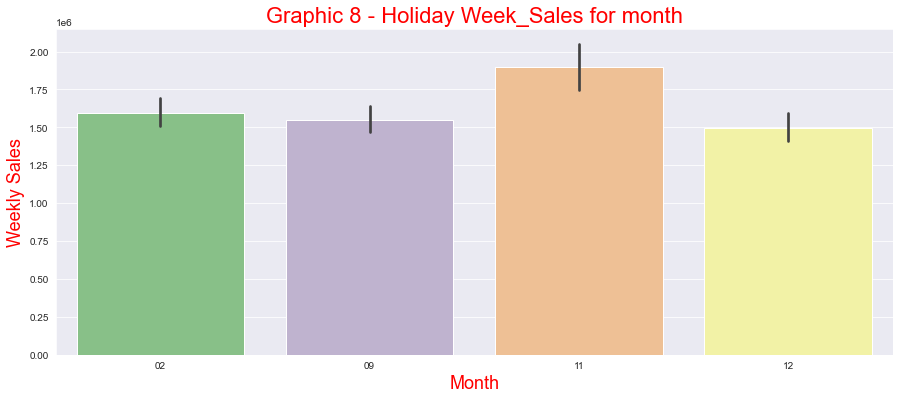

In [39]:
graphic8 = sns.barplot(data=dataset_holiday, x='Month', y='Weekly_Sales')
graphic8.figure.set_size_inches(15,6)
graphic8.set_title('Graphic 8 - Holiday Week_Sales for month', color='r', fontsize=22)
graphic8.set_xlabel('Month', color='r', fontsize=18)
graphic8.set_ylabel('Weekly Sales', color='r', fontsize=18)

Text(0, 0.5, 'Weekly Sales')

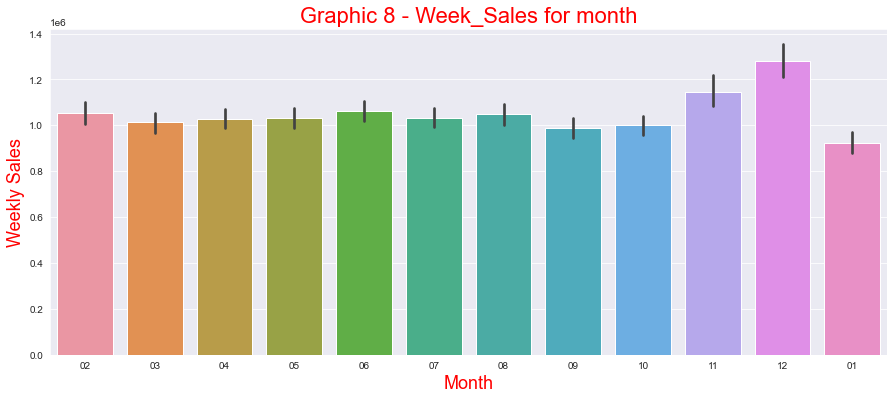

In [40]:
graphic9 = sns.barplot(data=dataset, x='Month', y='Weekly_Sales')
graphic9.figure.set_size_inches(15,6)
graphic9.set_title('Graphic 8 - Week_Sales for month', color='r', fontsize=22)
graphic9.set_xlabel('Month', color='r', fontsize=18)
graphic9.set_ylabel('Weekly Sales', color='r', fontsize=18)

### Create a new file with changes in dataset

In [43]:
dataset.to_csv('Walmart_Store_sales_new.csv', sep=',', index=False)